In [1]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats

In [35]:
pf_size = pd.read_csv('C:/Users/yz2991/Desktop/Portfolios_Formed_on_ME_daily.csv')
ff5 = pd.read_csv('C:/Users/yz2991/Desktop/F-F_Research_Data_5_Factors_2x3_daily.csv')
Other = pd.read_csv('C:/Users/yz2991/Desktop/Other Data.csv')

In [36]:
pf_size.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)
ff5.rename(columns = {'Unnamed: 0': 'YYMM'}, inplace = True)

In [37]:
#to convert to decile format and get excess returns
pf_size_excess=(pf_size.iloc[:,1:pf_size.shape[1]]).sub(ff5.RF,axis=0)

In [38]:
ff5['YYMM'] = pd.to_datetime(ff5['YYMM'],yearfirst=True, format='%Y%m%d')
pf_size_excess['YYMM'] = pd.to_datetime(pf_size['YYMM'],yearfirst=True, format='%Y%m%d')
Other['YYMM'] = pd.to_datetime(Other['YYMM'],yearfirst=True, format='%Y%m')

In [39]:
Other.index = Other['YYMM']

In [7]:
#change timestamps to index and delete unnecessary columns
ff5.index = ff5['YYMM']
pf_size_excess.index = pf_size_excess['YYMM']
ff5 = ff5.drop('YYMM', axis = 1)
# pf_size_excess = pf_size_excess.drop('YYMM', axis = 1)
ff5 = ff5.drop('RF', axis = 1)
#choose the size cut method
pf_size_excess = pf_size_excess.loc[:,['Lo 30','Med 40','Hi 30']]

            Lo 30  Med 40  Hi 30
YYMM                            
1963-07-01 -0.592  -0.552 -0.682
1963-07-02  0.428   0.578  0.838
1963-07-03  0.538   0.568  0.638
1963-07-05  0.318   0.328  0.418
1963-07-08 -0.442  -0.542 -0.642


In [8]:
us_crisis_1 = ['1973-10-19', '1975-2-28', 'OPEC Oil Embargo']
us_crisis_2 = ['1981-1-1', '1982-6-30', 'US Recession of 1981-1982']
us_crisis_3 = ['1989-9-30', '1991-3-30', 'Junk Bonk Crash/S&L Crisis']
us_crisis_4 = ['2001-9-11', '2003-6-30', '911 Attack']
us_crisis_5 = ['2007-8-1', '2009-7-1', '2008 Financial Crisis']
us_crisis_6 = ['2018-12-1', '2019-5-30', 'China-US Trade War']

other_crisis_1 = ['1997-9-1', '1998-6-30', 'Asia Crisis']
other_crisis_2 = ['1997-9-1', '1998-12-30', 'Russia Crisis']
other_crisis_3 = ['2001-1-1','2001-12-30', 'Dotcom Bubble Burst']
other_crisis_4 = ['2010-1-1', '2012-6-30', 'European Debt Crisis']
other_crisis_5 = ['2015-6-12','2015-10-30', 'Chinese Market Crash']
other_crisis_6 = ['2015-1-1', '2015-12-30', 'Swiss Franc Shock']

# us_crisis_1 = ['1973-10-19', '1974-12-30', 'OPEC Oil Embargo']
# us_crisis_2 = ['1980-1-1', '1980-5-30', 'US Recession of 1980']
# us_crisis_2 = ['1981-8-1', '1982-10-30', 'US Recession of 1981-1982']
# us_crisis_3 = ['1990-7-1', '1991-2-28', 'Junk Bonk Crash/S&L Crisis']
# us_crisis_4 = ['2001-9-11', '2003-6-30', '911 Attack']
# us_crisis_5 = ['2007-8-1', '2009-7-1', '2008 Financial Crisis']
# us_crisis_6 = ['2018-12-1', '2019-5-30', 'China-US Trade War']


print(us_crisis_1[1])

1975-2-28


In [9]:
start = ff5.index[0]
end = ff5.index[ff5.shape[0]-1]

n_day = end - start
print(n_day.days)
print(ff5.shape[0])
#because there are weekends and public holidays, we use every 126 records as a proxy of every 6-month window
#There are in total 14075 records, thus will have 14075 - 126 + 1 =  13950 windows
window = 126
n_window = ff5.shape[0] - 126 + 1
print(n_window)

20423
14075
13950


In [10]:
#To run OLS on a 6-month rolling window basis. The logic of this loop is to run the rolling window regressions 
#for each of the 3 portfolios. That is, the first 13950 models are for the portfolio Lo 30,
#the next 13950 models are for the portfolio Med 40
models = []
for i in range (3):
    for m in range(n_window):
        
        t0 = ff5.index[0+m]
        if ff5.index[0+m+window-1] < end:
            t1 = ff5.index[0+m+window-1]
        else:
            t1 = end
        
        x = ff5[t0:t1]
        x = sm.add_constant(x)
        y = pf_size_excess[t0:t1]
        reg = sm.OLS(y.iloc[:,i], x)
        
        models.append(reg.fit())

                            OLS Regression Results                            
Dep. Variable:                  Lo 30   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     701.9
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           4.98e-87
Time:                        14:55:24   Log-Likelihood:                 113.16
No. Observations:                 126   AIC:                            -214.3
Df Residuals:                     120   BIC:                            -197.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0204      0.009     -2.222      0.0

In [11]:
window_nm = []
for i in range(n_window):
    nm = ff5.index[i+int(window/2)]
    window_nm.append(nm)
print(len(window_nm))
portfolio = pf_size_excess.columns

126
13950


In [12]:
#In a loop, collect the coefficient of Mrk-Rf each of the 3 portfolios
Mrk = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models[i*n_window +n].params[1]) 
    Mrk["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)
#In a loop, collect the coefficient of SMB each of the 3 portfolios
SMB = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models[i*n_window +n].params[2]) 
    SMB["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)
#In a loop, collect the coefficient of HML each of the 3 portfolios
HML = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models[i*n_window +n].params[3]) 
    HML["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

#In a loop, collect the coefficient of RMW each of the 3 portfolios
RMW = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models[i*n_window +n].params[4]) 
    RMW["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)
#In a loop, collect the coefficient of CMA each of the 3 portfolios
CMA = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models[i*n_window +n].params[5]) 
    CMA["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)
#In a loop, collect the R-squared each of the 3 portfolios
Rsquare = {}
for i in range(3):
    x = []
    for n in range(n_window):  
        x.append(models[i*n_window +n].rsquared) 
    Rsquare["Portfoio{0}".format(i)] = pd.Series(x,index = window_nm)

In [41]:
VIX = Other["VIX - Close"]
VIX.dropna()

YYMM
1990-01-01    25.360001
1990-02-01    21.990000
1990-03-01    19.730000
1990-04-01    19.520000
1990-05-01    17.370001
1990-06-01    15.500000
1990-07-01    21.110001
1990-08-01    29.900000
1990-09-01    29.110001
1990-10-01    30.040001
1990-11-01    22.160000
1990-12-01    26.379999
1991-01-01    20.910000
1991-02-01    21.230000
1991-03-01    16.879999
1991-04-01    18.240000
1991-05-01    15.930000
1991-06-01    19.549999
1991-07-01    15.180000
1991-08-01    14.460000
1991-09-01    15.850000
1991-10-01    15.480000
1991-11-01    20.260000
1991-12-01    19.309999
1992-01-01    17.400000
1992-02-01    16.680000
1992-03-01    16.180000
1992-04-01    15.530000
1992-05-01    13.860000
1992-06-01    13.350000
                ...    
2017-01-01    11.990000
2017-02-01    12.920000
2017-03-01    12.370000
2017-04-01    10.820000
2017-05-01    10.410000
2017-06-01    11.180000
2017-07-01    10.260000
2017-08-01    10.590000
2017-09-01     9.510000
2017-10-01    10.180000
2017-11-01 

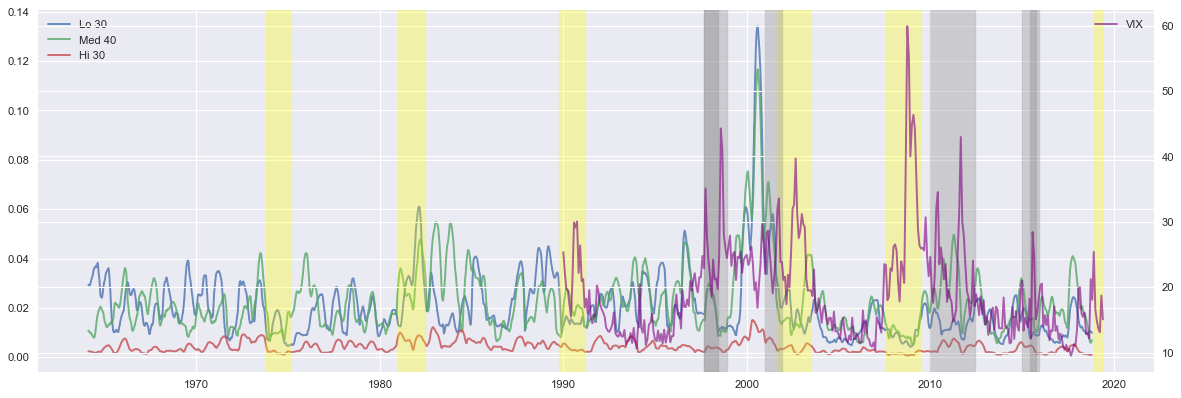

In [55]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
for i in range(3):
    rolling_Vol = Mrk["Portfoio{0}".format(i)].rolling(window=rolling_len, center = True).std(ddof=0)
    plt.plot(rolling_Vol,label=portfolio[i],alpha=0.8)

plt.legend(loc='upper left')
plt2 = plt.twinx() 
plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

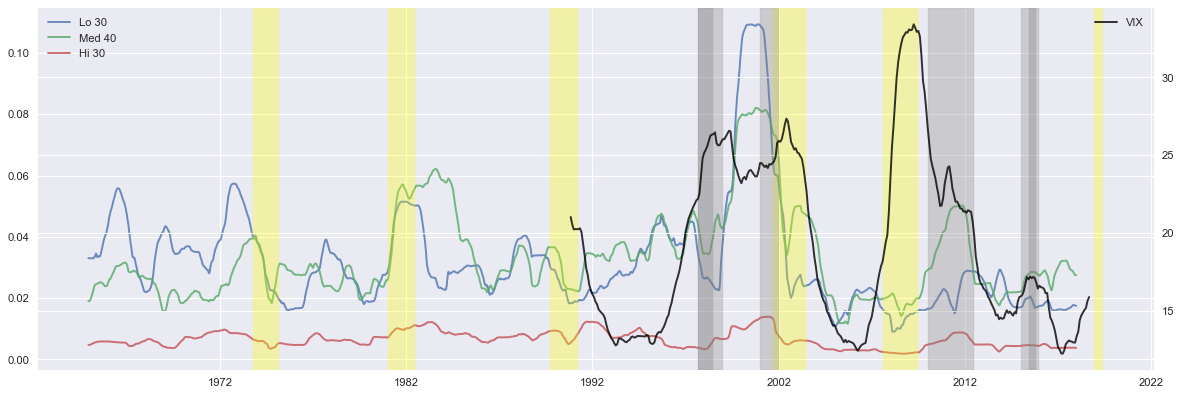

In [65]:
rolling_len = 600
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
for i in range(3):
    rolling_Vol = Mrk["Portfoio{0}".format(i)].rolling(window=rolling_len, center = True).std(ddof=0)
    plt.plot(rolling_Vol,label=portfolio[i],alpha=0.8)

plt.legend(loc='upper left')
plt2 = plt.twinx() 

VIX_rolling = VIX.rolling(window=20, center=True).mean()
plt2.plot(VIX_rolling, label = "VIX", color = 'black', alpha = 0.8)
    

plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

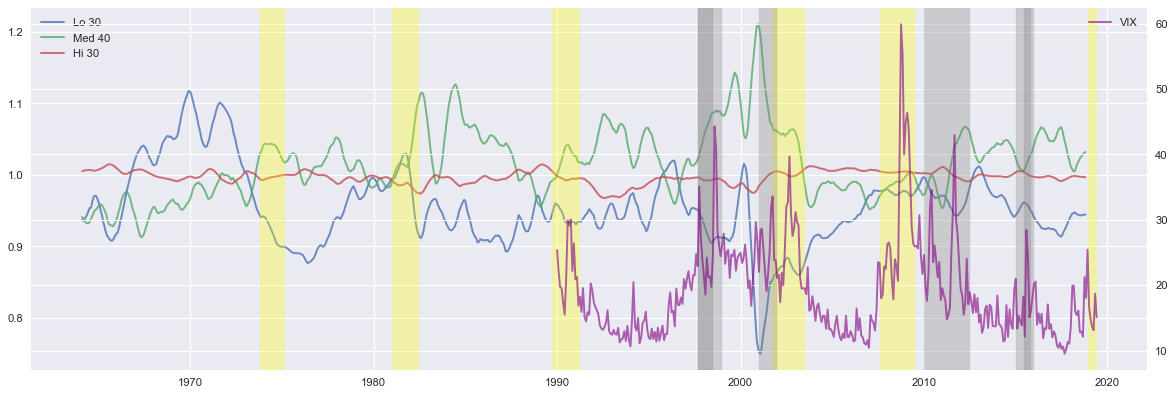

In [62]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
for i in range(3):
    rolling_Vol = Mrk["Portfoio{0}".format(i)].rolling(window=rolling_len, center = True).mean()
    plt.plot(rolling_Vol,label=portfolio[i],alpha=0.8)

plt.legend(loc='upper left')
plt2 = plt.twinx() 
plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

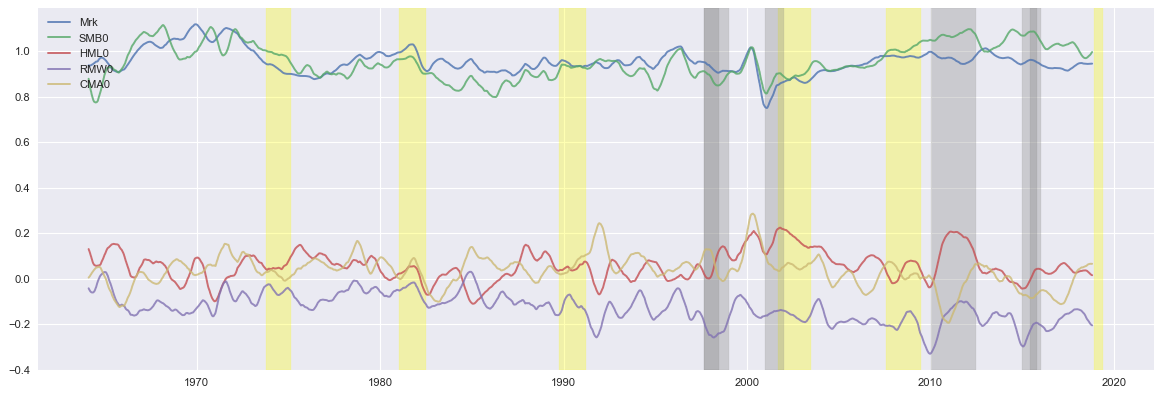

In [63]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')

rolling_Mrk0 = Mrk["Portfoio0"].rolling(window=rolling_len, center = True).mean()
rolling_SMB0 = SMB["Portfoio0"].rolling(window=rolling_len, center = True).mean()
rolling_HML0 = HML["Portfoio0"].rolling(window=rolling_len, center = True).mean()
rolling_RMW0 = RMW["Portfoio0"].rolling(window=rolling_len, center = True).mean()
rolling_CMA0 = CMA["Portfoio0"].rolling(window=rolling_len, center = True).mean()
plt.plot(rolling_Mrk0,label="Mrk",alpha=0.8)
plt.plot(rolling_SMB0,label="SMB0",alpha=0.8)
plt.plot(rolling_HML0,label="HML0",alpha=0.8)
plt.plot(rolling_RMW0,label="RMW0",alpha=0.8)
plt.plot(rolling_CMA0,label="CMA0",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

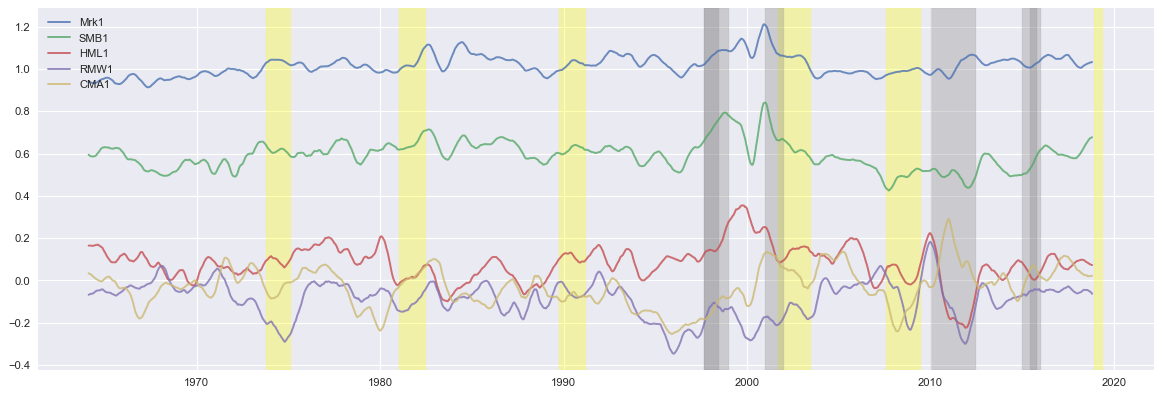

In [66]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')

rolling_Mrk0 = Mrk["Portfoio1"].rolling(window=rolling_len, center = True).mean()
rolling_SMB0 = SMB["Portfoio1"].rolling(window=rolling_len, center = True).mean()
rolling_HML0 = HML["Portfoio1"].rolling(window=rolling_len, center = True).mean()
rolling_RMW0 = RMW["Portfoio1"].rolling(window=rolling_len, center = True).mean()
rolling_CMA0 = CMA["Portfoio1"].rolling(window=rolling_len, center = True).mean()
plt.plot(rolling_Mrk0,label="Mrk1",alpha=0.8)
plt.plot(rolling_SMB0,label="SMB1",alpha=0.8)
plt.plot(rolling_HML0,label="HML1",alpha=0.8)
plt.plot(rolling_RMW0,label="RMW1",alpha=0.8)
plt.plot(rolling_CMA0,label="CMA1",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

In [70]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('coefficients.xlsx', engine='xlsxwriter')

df1 = pd.DataFrame([Mrk["Portfoio0"],SMB["Portfoio0"],HML["Portfoio0"],RMW["Portfoio0"], CMA["Portfoio0"]], columns=['Mek', 'SMB', 'HML', 'RMW', 'CMA'])

print(Mrk["Portfoio0"].head())
print(df1.head())
# Write each dataframe to a different worksheet.
Mrk["Portfoio0"].to_excel(writer, sheet_name='Mrk')
SMB["Portfoio0"].to_excel(writer, sheet_name='SMB')
HML["Portfoio0"].to_excel(writer, sheet_name='HML')
RMW["Portfoio0"].to_excel(writer, sheet_name='RMW')
CMA["Portfoio0"].to_excel(writer, sheet_name='CMA')


s.to_frame(name='column_name').to_excel('xlfile.xlsx', sheet_name='s')

# Close the Pandas Excel writer and output the Excel file.
writer.save()



1963-09-30    0.933110
1963-10-01    0.938586
1963-10-02    0.943084
1963-10-03    0.946856
1963-10-04    0.946251
dtype: float64
   Mek  SMB  HML  RMW  CMA
0  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN


AttributeError: 'Series' object has no attribute 'to_excel'

In [102]:
writer = pd.ExcelWriter('xlfile.xlsx', engine='xlsxwriter')
Mrk["Portfoio0"].to_frame(name='Mrk').to_excel(writer, sheet_name='Mrk')
SMB["Portfoio0"].to_frame(name='SMB').to_excel(writer, sheet_name='SMB')
HML["Portfoio0"].to_frame(name='HML').to_excel(writer, sheet_name='HML')
RMW["Portfoio0"].to_frame(name='RMW').to_excel(writer, sheet_name='RMW')
CMA["Portfoio0"].to_frame(name='CMA').to_excel(writer, sheet_name='CMA')
writer.save()

PermissionError: [Errno 13] Permission denied: 'xlfile.xlsx'

In [109]:
proportion = pd.read_csv('C:/Users/yz2991/Desktop/factor explaining proportion.csv')

In [110]:
proportion['YYMM'] = pd.to_datetime(proportion['YYMM'],yearfirst=False, format='%Y%m%d')
proportion.index = proportion['YYMM']

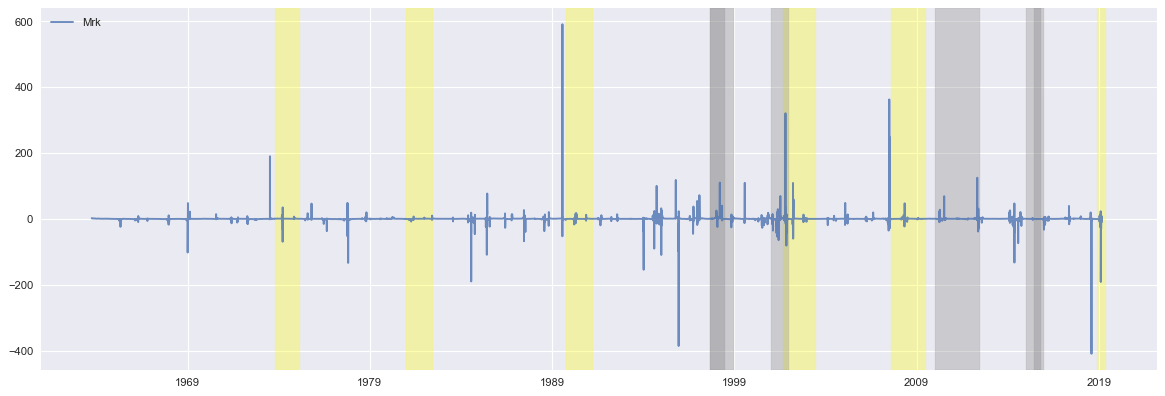

In [111]:
# The coefficients are from regressions of 3 size-portfolio 5-factor model with daily data
#The factors are moving average with the same windows as each regression
#each time point is the mid-point of each regression window

rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(proportion["Mrk"],label="Mrk",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

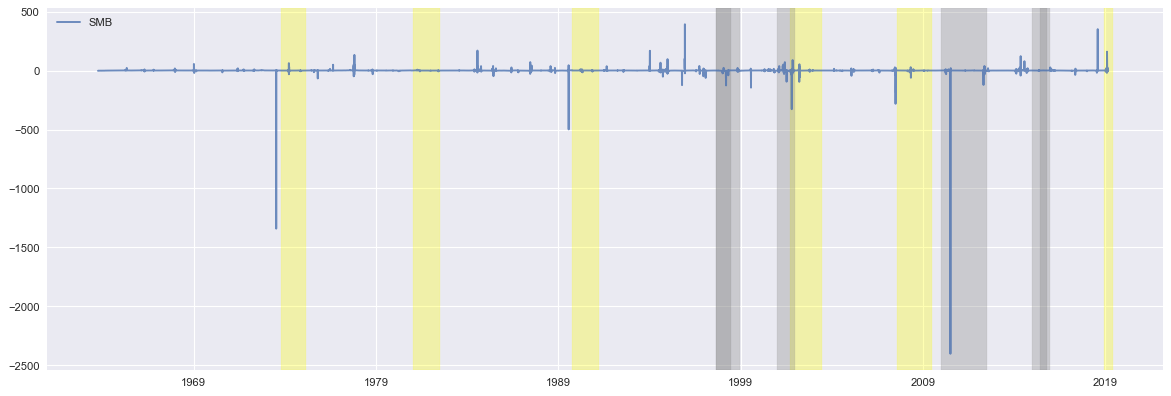

In [112]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(proportion["SMB"],label="SMB",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

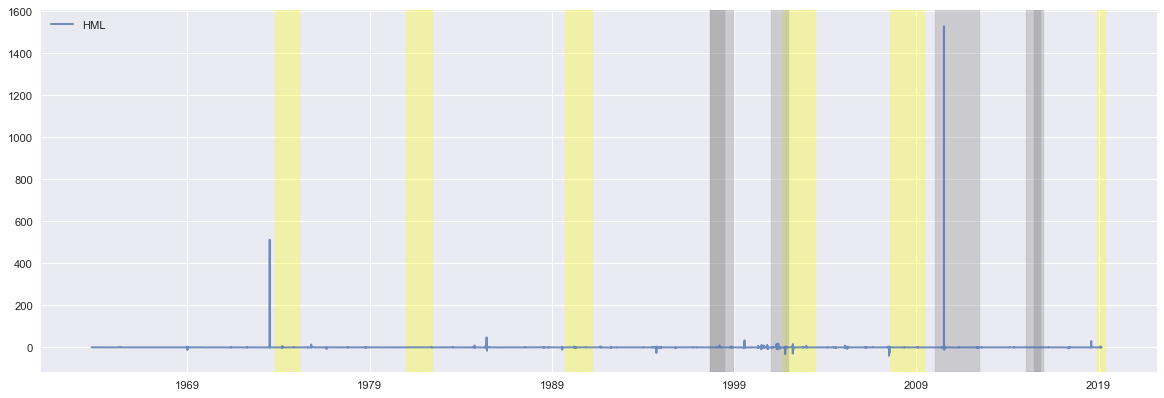

In [113]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(proportion["HML"],label="HML",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

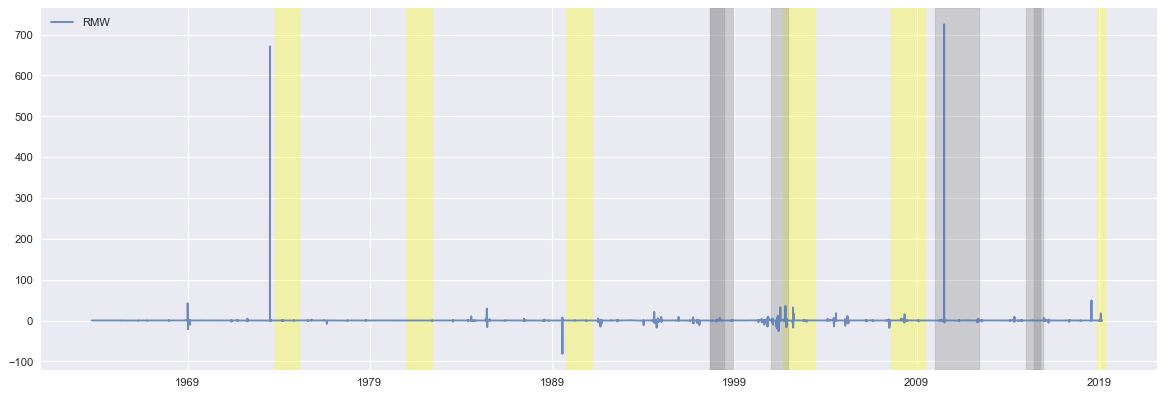

In [114]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(proportion["RMW"],label="RMW",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()

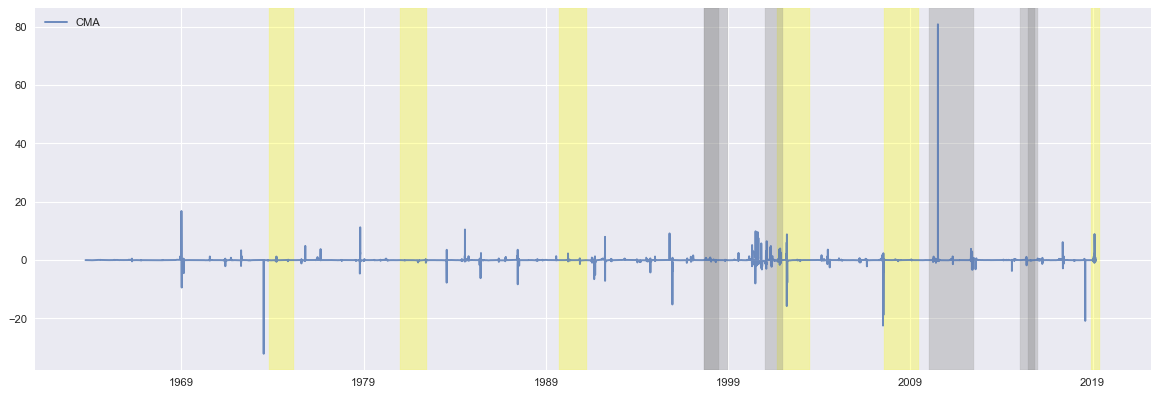

In [115]:
rolling_len = 180
fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')


plt.plot(proportion["CMA"],label="CMA",alpha=0.8)

plt.legend(loc='upper left')
# plt2 = plt.twinx() 
# plt2.plot(VIX, label = "VIX", color = 'purple', alpha = 0.6)
    

# plt2.legend(loc='upper right') 

plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')
plt.show()